In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

C:\Users\win10\AppData\Local\Temp/ipykernel_4496/3180987012.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, signal = wavfile.read('./sample.wav')


channels = 2
length = 2.0160090702947846
int16
[[    -1  14283]
 [ 14285  27812]
 [ 27811  32767]
 ...
 [-32768 -32767]
 [-32767 -21842]
 [-21841  -8055]]
[    -1  14285  27811 ... -32768 -32767 -21841]
[ 14283  27812  32767 ... -32767 -21842  -8055]


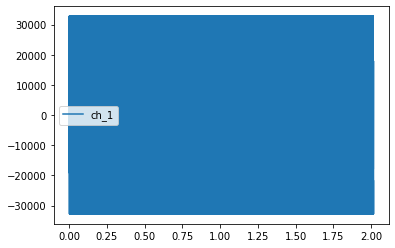

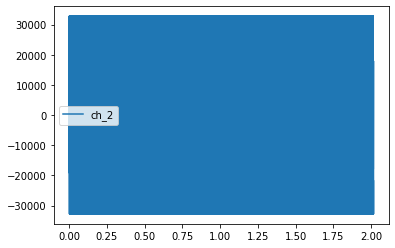

In [2]:
samplerate, signal = wavfile.read('./sample.wav')
print(f"channels = {signal.shape[1]}")
length = signal.shape[0] / samplerate
print(f"length = {length}")

print(signal.dtype)
channel_1 = signal[:,0]
channel_2 = signal[:,1]
print(signal)
print(channel_1)
print(channel_2)

plt.plot([i*(1/samplerate) for i in range(len(channel_1))],channel_1, label='ch_1')
plt.legend()
plt.show()

plt.plot([i*(1/samplerate) for i in range(len(channel_1))],channel_1, label='ch_2')
plt.legend()
plt.show()

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


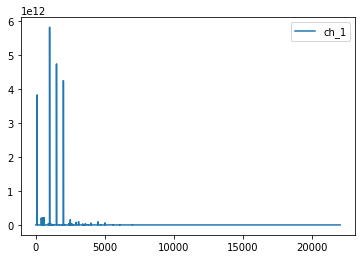

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


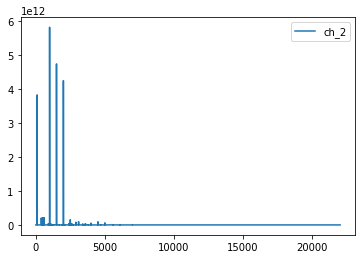

In [3]:
n = len(channel_1)
fft = np.fft.fft(channel_1,n)
PSD = fft * np.conj(fft) / n
dt = 1/samplerate
freq = 1/(dt*n) *np.arange(n)

n_2 = len(channel_2)
fft_2 = np.fft.fft(channel_2,n_2)
PSD_2 = fft_2 * np.conj(fft_2) / n_2
dt_2 = 1/samplerate
freq_2 = 1/(dt*n_2) *np.arange(n_2)


L = np.arange(1,np.floor(n/2),dtype = 'int')
plt.plot(freq[L],PSD[L],label='ch_1')
plt.legend()
plt.show()
plt.plot(freq[L],PSD_2[L],label='ch_2')
plt.legend()
plt.show()


C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


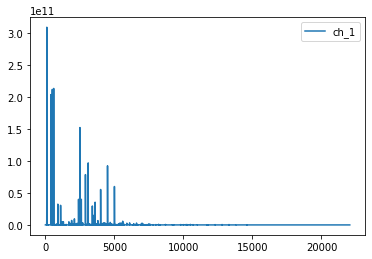

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


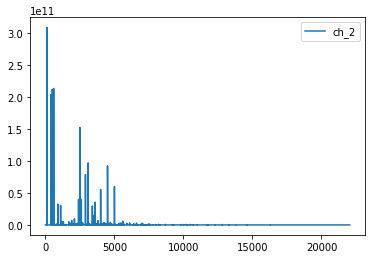

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


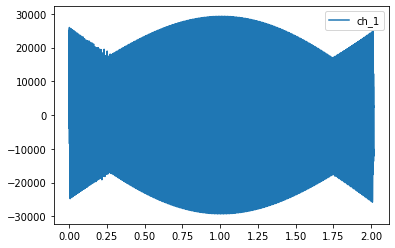

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


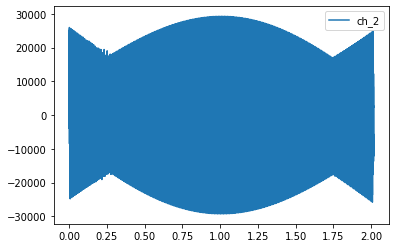

In [4]:
filter_1 = PSD<0.2*max(PSD[L])
filter_2 = PSD<0.2*max(PSD_2[L])

PSD_filtered = PSD*filter_1
fft_filtered = fft*filter_1

PSD_2_filtered = PSD_2*filter_2
fft_2_filtered = fft_2*filter_2 

filtered_sound =  np.fft.ifft(fft_filtered)
filtered_sound_2 =  np.fft.ifft(fft_2_filtered)


plt.plot(freq[L],PSD_filtered[L],label='ch_1')
plt.legend()
plt.show()
plt.plot(freq[L],PSD_2_filtered[L],label='ch_2')
plt.legend()
plt.show()

plt.plot([i*(1/samplerate) for i in range(len(filtered_sound))],filtered_sound,label='ch_1')
plt.legend()
plt.show()
plt.plot([i*(1/samplerate) for i in range(len(filtered_sound_2))],filtered_sound_2,label='ch_2')
plt.legend()
plt.show()

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


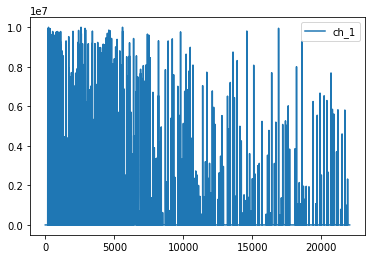

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


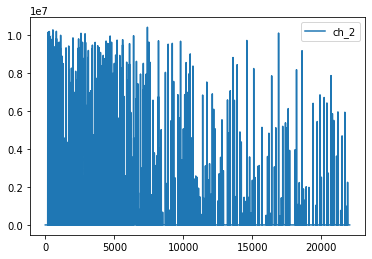

In [5]:
Upper_thershored = PSD<1*(10**6)
lower_thershored = PSD>8*(10**5)

filter_except = Upper_thershored & lower_thershored

Upper_thershored = PSD<1*(10**7)
lower_thershored = PSD>5*(10**5)

filter_main = Upper_thershored & lower_thershored


# filter_except= filter_1 & filter_2

filter = filter_main & np.logical_not(filter_except)


PSD_filtered = PSD*filter
fft_filtered = fft*filter 

PSD_2_filtered = PSD_2*filter
fft_2_filtered = fft_2*filter 

filtered_sound =  np.fft.ifft(fft_filtered)
filtered_sound_2 =  np.fft.ifft(fft_2_filtered)

plt.plot(freq[L],PSD_filtered[L],label='ch_1')
plt.legend()
plt.show()

plt.plot(freq[L],PSD_2_filtered[L],label='ch_2')
plt.legend()
plt.show()

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


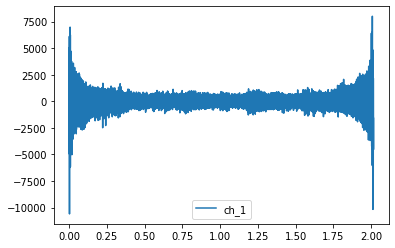

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


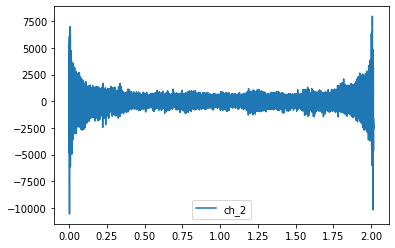

In [6]:
filtered_sound = filtered_sound
filtered_sound_2=filtered_sound_2
plt.plot(dt*np.arange(len(filtered_sound)),filtered_sound,label="ch_1")
plt.legend()
plt.show()

plt.plot(dt*np.arange(len(filtered_sound)),filtered_sound_2,label="ch_2")
plt.legend()
plt.show()

In [7]:
wave_data = np.array(list(zip(filtered_sound.real.astype('int16'),filtered_sound_2.real.astype('int16'))))

wavfile.write('filtered.wav',samplerate,wave_data)